<a href="https://colab.research.google.com/github/MMaxG/EYE-2022-Group-14/blob/main/EYE_2022_Group_14_Course_Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('eye_data.csv', header=None) #Change path if running locally e.g. with jupyterlab
print(df.iloc[:, 2:].iloc[:, ::2].values) # X values = Every other value from every column starting from the 3rd

[[-765.55 -765.9  -765.9  ...  -29.5   -29.85  -30.55]
 [ 735.38  734.64  735.38 ... -275.27 -276.01 -276.01]
 [ 481.59  480.58  480.08 ...  -24.87  -26.38  -27.39]
 ...
 [ -81.06  -81.36  -81.36 ... -405.3  -405.3  -405.6 ]
 [ 789.81  790.66  789.81 ... -371.52 -371.52 -371.52]
 [ 786.83  787.53  788.93 ...  -14.36  -15.41  -16.11]]


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,s10,False,-765.55,-985.82,-765.90,-985.82,-765.90,-985.82,-765.55,-985.82,...,-28.10,283.02,-28.45,282.51,-29.50,281.49,-29.85,280.99,-30.55,281.49
1,s10,False,735.38,276.22,734.64,274.54,735.38,274.54,736.86,274.54,...,-272.31,-313.16,-273.05,-313.16,-275.27,-314.84,-276.01,-318.19,-276.01,-318.19
2,s10,False,481.59,-146.64,480.58,-144.96,480.08,-146.64,479.57,-150.01,...,-23.35,124.87,-23.86,124.87,-24.87,121.49,-26.38,119.81,-27.39,118.12
3,s10,False,-31.07,54.53,-31.75,52.53,-29.02,56.54,-28.34,62.56,...,-136.23,-3.66,-135.55,-3.66,-135.55,-3.66,-134.87,-1.65,-133.50,2.36
4,s10,True,-8.36,30.49,-8.36,29.89,-8.63,29.29,-8.63,28.70,...,-183.27,-66.81,-187.71,-76.96,-191.89,-86.51,-195.03,-94.27,-197.65,-102.03


Data row:  221
this[0] [(474.15, 598.38), (473.34, 600.3), (473.34, 602.22), (474.96, 602.22), (476.58, 596.47)]
[(474.15, 598.38), (473.34, 600.3), (473.34, 602.22), (474.96, 602.22), (476.58, 596.47), (476.58, 594.55), (474.96, 596.47), (474.96, 600.3), (476.58, 602.22), (478.2, 602.22), (479.01, 600.3), (478.2, 600.3), (477.39, 600.3), (478.2, 598.38), (479.82, 598.38), (481.44, 598.38), (481.44, 600.3), (477.39, 602.22), (474.15, 600.3), (473.34, 596.47), (474.15, 596.47), (474.96, 596.47), (475.77, 596.47), (476.58, 596.47), (477.39, 596.47), (476.58, 596.47), (475.77, 598.38), (476.58, 598.38), (476.58, 596.47), (475.77, 596.47), (474.96, 598.38), (474.15, 600.3), (475.77, 602.22), (478.2, 602.22), (479.01, 598.38), (477.39, 598.38), (475.77, 598.38), (474.96, 598.38), (474.96, 598.38), (474.96, 598.38), (474.96, 600.3), (476.58, 600.3), (478.2, 596.47), (479.01, 592.64), (479.01, 590.72), (479.01, 592.64), (478.2, 596.47), (476.58, 594.55), (477.39, 590.72), (479.01, 590.72), (4

Text(0.5, 1.0, 'Our algorithm')

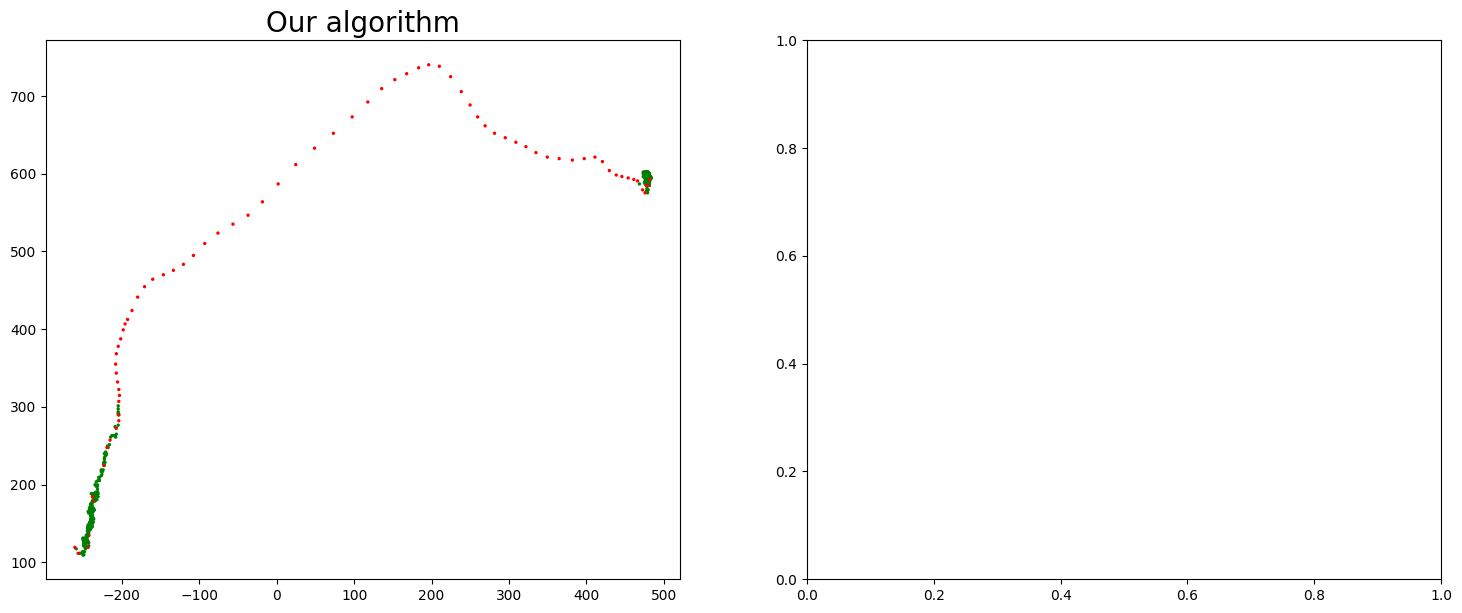

In [ ]:
# Task 2.
import math
import random

def our_algorithm(gaze_points, threshold): # gaze_points = list where [[x, y], [x, y]...]
  print(gaze_points)
  distances = [] # list to add dispersions/distances between two points to
  for current_point, next_point in zip(gaze_points, gaze_points[1:]): # zip combines two lists, result is a list with a point and the point after it [[x1, y1], [x2, y2]...]
    distance = math.hypot((next_point[0] - current_point[0]), (next_point[-1] - current_point[-1])) # calculating the distance using pythagorean theorem c = sqrt(a^2+b^2). Math.hypot takes a and b and gives c
    distances.append(distance) # since we are in a for loop where we calculate the distance for each point and its following point, we add the distance to the list
  events = [] # We need to return a list where a distance is considered either a fixation or a saccade, so we make a new list
  for value in distances: # go through each distance in the previously made distances list...
    if value < threshold: # ... if the distance is less than the threshold parameter, its a fixation...
      events.append("Fixation")
    else:                 # ... otherwise its a saccade
      events.append('Saccade')
  events.append('blank') # Got an error because the list was too short by 1 value, so added another. Reason: need n+1 values to calculate distance between n values
  return events

#print(df.iloc[:, 2:].iloc[:, ::2].iloc[0].values) # working: X values in a list
#print(df.iloc[:, 3:].iloc[:, ::2].iloc[0].values) # working: Y values in a list

# !!!
# Change this for different visualizations; row number in dataset
# Try these: 31 for min, 125 for max, 77 for bad data

n =  random.randrange(df.shape[0])
threshold = 5
print("Data row: ", n)

this = list(zip(df.iloc[:, 2:].iloc[:, ::2].iloc[n].values, df.iloc[:, 3:].iloc[:, ::2].iloc[n].values))
print("this[0]", this[:5])
events = our_algorithm(this, threshold) # TODO: tweak threshold

our_colors = ['green' if x == 'Fixation' else 'red' for x in events]
fig, ax = plt.subplots(ncols=2, figsize=(18,7))
ax[0].scatter(df.iloc[:, 2:].iloc[:, ::2].iloc[n].values, df.iloc[:, 3:].iloc[:, ::2].iloc[n].values, color=our_colors, s=2)
ax[0].set_title('Our algorithm', fontdict={'fontsize':20})

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation

%matplotlib inline
fig, ax = plt.subplots()
print("max x:", df.iloc[:, 2:].iloc[:, ::2].iloc[n].max(), ", min x", df.iloc[:, 2:].iloc[:, ::2].iloc[n].min(), ". max y: ", df.iloc[:, 3:].iloc[:, ::2].iloc[n].max(), ", min y:", df.iloc[:, 3:].iloc[:, ::2].iloc[n].min())
ax.axis([df.iloc[:, 2:].iloc[:, ::2].iloc[n].min()-50,df.iloc[:, 2:].iloc[:, ::2].iloc[n].max()+50,df.iloc[:, 3:].iloc[:, ::2].iloc[n].min()-50,df.iloc[:, 3:].iloc[:, ::2].iloc[n].max()+50])
m = ax.plot([],[], 'o', color='black', markersize=3)
draw_points_n = 20
def animate(i):
  #print(df.iloc[:, 2:].iloc[:, ::2].iloc[n].iloc[i-draw_points_n:i])
  m[0].set_data(df.iloc[:, 2:].iloc[:, ::2].iloc[n].iloc[i-draw_points_n:i], df.iloc[:, 3:].iloc[:, ::2].iloc[n].iloc[i-draw_points_n:i])

gaze_animation = matplotlib.animation.FuncAnimation(fig, animate, frames=500, interval=10)

In [ ]:
from IPython.display import HTML
HTML(gaze_animation.to_jshtml())

2. Mean Fixation Durations (MFD) for each subject

Calculating the duration of fixations in each row for a specific subject

In [ ]:
def listify(n):
  values = []       #  in one list ((x,y), (x,y))
  values = list(zip(df.iloc[:, 2:].iloc[:, ::2].iloc[n].values, df.iloc[:, 3:].iloc[:, ::2].iloc[n].values))
  combined_list = []
  combined_list.append(df.iloc[n].iloc[0])
  combined_list.append(df.iloc[n].iloc[1])
  combined_list.append(values)
  return combined_list



listofrows = []
for subject in list(df[0].unique()): # .unique() =  ['s10' 's14' 's16' 's2' 's20' 's22' 's28' 's30' 's8' 's9']
  for index, row in df.iloc[:, 2:].loc[df[0] == subject].iterrows():
    listofrows.append(listify(index))

data_algoed = []
# make a list (('s10', False, Fixation, Fixation, Fixation,..), (...))
for row in listofrows:
  result_list = []
  data_row = []
  data_row.append(row[0])
  data_row.append(row[1])
  result_list.append(our_algorithm(row[2], threshold))
  [result_list_fixed] = result_list
  for result in result_list_fixed:
    data_row.append(result)
  data_algoed.append(data_row)


#print(data_algoed[0][:-1])
# make a list = [('subject', 'Bool', 'Fixation dur', Fixation dur', Fixation dur',..), (...), (...)]
duration_data = []


for row in data_algoed:                                                           # row: ['s30', False, 'Fixation', 'Fixation', 'Fixation',..]
  duration_data_pre = []
  fixation_dur = 0
  duration_data_pre.append(row[0])
  duration_data_pre.append(row[1])
  #print(row[2:][:-1])
  for result in row[2:]:                                                          # skip first 2 values in the row because they are the subject and the bool
    if result == 'Fixation':
      fixation_dur += 10
    if (result == 'Saccade' and fixation_dur > 0) or (fixation_dur > 0 and result == 'blank'): # needed an extra or case where data ends during fixation (didn't add the fixation otherwise)
      duration_data_pre.append(fixation_dur)
      fixation_dur = 0
  duration_data.append(list(duration_data_pre))

print(data_algoed)


In [ ]:
subject_id = []


# Adding subject_id
for subject in list(df[0].unique()):
  subject_id.append(subject)

# Adding MFD_true (Mean Fixation Duration when True)
mfd_true = []
previous_sub = 's10'
sum = 0
count = 0

duration_data.append("blank") # Needed for the following for loop to notice it end

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  else:
    mfd_true.append(round(sum/count))
    sum = 0
    count = 0
    if row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  previous_sub = current_sub


# Adding MFD_SD_true (Mean Fixation Duration Standard Deviation (from average of all) when true)

mfd_mean_sum = 0
for value in mfd_true:
  mfd_mean_sum += value

mfd_sd_true = []
i=0

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == True:
      for value in row[2:]:
        sum += (value - mfd_true[i])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    mfd_sd_true.append(round((sum/count)**(1/2)))
    sum = 0
    count = 0
    i += 1
    if row[1] == True:
      for value in row[2:]:
        sum += (value - mfd_true[i])**2
        count += 1
  previous_sub = current_sub

# MFD_false
mfd_false = []
previous_sub = 's10'
sum = 0
count = 0

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False:
      for value in row[2:]:
        sum += value
        count += 1
  else:
    mfd_false.append(round(sum/count))
    sum = 0
    count = 0
    if row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  previous_sub = current_sub


# MFD_SD_false

mfd_mean_sum = 0
for value in mfd_false:
  mfd_mean_sum += value

mfd_sd_false = []
i=0

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False:
      for value in row[2:]:
        sum += (value - mfd_false[i])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    mfd_sd_false.append(round((sum/count)**(1/2)))
    sum = 0
    count = 0
    i += 1
    if row[1] == False:
      for value in row[2:]:
        sum += value
        count += 1
  previous_sub = current_sub


In [ ]:
# MSA (Mean Saccade Amplitude).
# Amplitude = Angular distance traversed during saccade
# We werent given the size of the whole monitor,
# Don't feel like messing with xs, ys and trigon, to figure out distance from eye to screen
# so assuming 16:9 23 inch monitor -> after some math 31.5 pixels/°

# Need a list of saccade amplitudes to calculate mean from

amplitude_data = []

#print(data_algoed[0][2]) # First result of first row
#print(listofrows[0][2][0], listofrows[0][2][1]) # First
for index, row in enumerate(data_algoed):                                                           # row: ['s30', False, 'Fixation', 'Fixation', 'Fixation',..]
  amplitude_data_pre = []                                                         # (start, end, start, end,..)
  saccade_goingon = False
  amplitude_data_pre.append(row[0])
  amplitude_data_pre.append(row[1])
  end_point = ()
  for i, result in enumerate(row[2:]):
    if result == 'Fixation' and saccade_goingon == True  or (saccade_goingon == True and result == 'blank'):
      #print("Stopping saccade, adding", end_point, "to data")
      amplitude_data_pre.append(end_point)
      saccade_goingon = False
    if result == 'Saccade' and saccade_goingon == False: # needed an extra or case where data ends during fixation (didn't add the fixation otherwise)
      #print("Saccade started")
      #print("Saccade started", listofrows[index][2][i], ", end point at", listofrows[index][2][i+1])
      amplitude_data_pre.append(listofrows[index][2][i])
      end_point = listofrows[index][2][i+1]
      saccade_goingon = True
    if result == 'Saccade' and saccade_goingon == True:
      #print("Saccade continuing, updating end_point", listofrows[index][2][i])
      end_point = listofrows[index][2][i]
  amplitude_data.append(list(amplitude_data_pre))

print(amplitude_data[0])

#print(end_data)

In [ ]:
# MSA_true

msa_true = []
previous_sub = 's10'
sum = 0
count = 0

amplitude_data.append("blank") # Needed for the following for loop to notice it end

amplitudes = []
for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == True:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
       #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  else:
    print(previous_sub, "ended, current ", current_sub, ". Sum reset to 0")
    msa_true.append(round(sum/count, 2))
    sum = 0
    count = 0
    if row[1] == True:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
        #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  previous_sub = current_sub

In [ ]:
# MSA_SD_true

msa_mean_sum = 0
for value in msa_true:
  msa_mean_sum += value

msa_sd_true = []
y=0


for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == True:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    msa_sd_true.append(round((sum/count)**(1/2), 2))
    sum = 0
    count = 0
    y += 1
    if row[1] == True:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  previous_sub = current_sub


print(msa_sd_true)

In [ ]:
# MSA_false

msa_false = []
previous_sub = 's10'
sum = 0
count = 0

amplitude_data.append("blank") # Needed for the following for loop to notice it end

amplitudes = []
for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
       #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  else:
    print(previous_sub, "ended, current ", current_sub, ". Sum reset to 0")
    msa_false.append(round(sum/count, 2))
    sum = 0
    count = 0
    if row[1] == False:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
        #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  previous_sub = current_sub

print(msa_false)

In [ ]:
# MSA_SD_false

msa_mean_sum = 0
for value in msa_false:
  msa_mean_sum += value

msa_sd_false = []
y=0


for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    msa_sd_false.append(round((sum/count)**(1/2), 2))
    sum = 0
    count = 0
    y += 1
    if row[1] == False:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  previous_sub = current_sub

print(msa_sd_false)



In [ ]:
# MFD_overall

mfd_overall = []
previous_sub = 's10'
sum = 0
count = 0

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False or row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  else:
    mfd_overall.append(round(sum/count))
    sum = 0
    count = 0
    if row[1] == False or row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  previous_sub = current_sub

print("mfd true", mfd_true)
print("mfd false", mfd_false)
print("mfd overall", mfd_overall)


In [ ]:
# MFD_overall_SD


mfd_mean_sum = 0
for value in mfd_false:
  mfd_mean_sum += value

mfd_overall_sd = []
i=0

for row in duration_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False or row[1] == True:
      for value in row[2:]:
        sum += (value - mfd_false[i])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    mfd_overall_sd.append(round((sum/count)**(1/2)))
    sum = 0
    count = 0
    i += 1
    if row[1] == False or row[1] == True:
      for value in row[2:]:
        sum += value
        count += 1
  previous_sub = current_sub

print(mfd_sd_false)
print(mfd_sd_true)
print(mfd_overall_sd)

In [ ]:
# MSA_overall

msa_overall = []
previous_sub = 's10'
sum = 0
count = 0

amplitudes = []
for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == True or row[1] == False:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
       #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  else:
    print(previous_sub, "ended, current ", current_sub, ". Sum reset to 0")
    msa_overall.append(round(sum/count, 2))
    sum = 0
    count = 0
    if row[1] == True or row[1] == False:
      for i, value in enumerate(row[2::2]): # starting coords (every other value after 2nd)
        #print("start", value, "end", row[3+2*i], row[3+2*i])
        #print(row[0], "sum increased from", round(sum, 2), "to", round((sum+math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5), 2), ", count is", count+1)
        sum += (math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5)
        count += 1
  previous_sub = current_sub

print(msa_overall)

In [ ]:
# MSA_overall_SD


msa_mean_sum = 0
for value in msa_false:
  msa_mean_sum += value

msa_overall_sd = []
y=0


for row in amplitude_data:
  current_sub = row[0]
  if (current_sub == previous_sub):
    if row[1] == False or row[1] == True:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  if (current_sub != previous_sub and sum != 0):
    #print(sum, "/", count, ")**1/2 =", round((sum/count)**(1/2)))
    msa_overall_sd.append(round((sum/count)**(1/2), 2))
    sum = 0
    count = 0
    y += 1
    if row[1] == False or row[1] == True:
      for i, value in enumerate(row[2::2]):
        #print("value", round(math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5, 2), ", MSA value for", row[0], ", True =", msa_true[y])
        sum += ((math.hypot((row[3+2*i][0] - value[0]), (row[3+2*i][1] - value[1]))/31.5) - msa_true[y])**2
        count += 1
  previous_sub = current_sub

print(msa_true)
print(msa_false)
print(msa_overall_sd)

In [ ]:
final_data = list(zip(subject_id, mfd_true, mfd_sd_true, mfd_false, mfd_sd_false, msa_true, msa_sd_true, msa_false, msa_sd_false, mfd_overall, mfd_overall_sd, msa_overall, msa_overall_sd))
#print(final_data)

df_stats = pd.DataFrame(columns=["subject_id", "MFD_true", "MFD_SD_true", "MFD_false", "MFD_SD_false", "MSA_true", "MSA_SD_true", "MSA_false", "MSA_SD_false", "MFD_overall", "MFD_overall_SD", "MSA_overall", "MSA_overall_SD"])

for index, row in enumerate(final_data):
  df_stats.loc[index] = row

df_stats

And bobs your uncle, we have a CSV

In [ ]:
df_stats.to_csv('final_data.csv')